# Compute_Stats

Queremos comparar los resultados obtenidos por un algoritmo de reconocimiento de objetos 3D. Por cada objeto reconocido se conoce su area2D, area3D y nivel de complejidad expresado como un número entero. Tanto los resultados generados por el algoritmo, como el groundtruth, se encuentran en ficheros csv diferentes (ver
ficheros adjuntos con el enunciado).
Se desea analizar cada característica por separado, generando una gráfica por cada
una de ellas.

## Imports

In [0]:
import os
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import argparse

## Variables globales de lectura y escritura

In [0]:
URLDetection = "./detection.csv"
URLGroundtruth = "./groundtruth.csv"
URLoutput = "./"

 ## lectura de datos

In [0]:
detection = pd.read_csv(URLDetection, na_values="-")
groundtruth = pd.read_csv(URLGroundtruth, na_values="-")

detection_values = detection.values
groundtruth_values = groundtruth.values

## creación de las columnas para las graficas 2D y 3D

In [0]:
ranges = range(0, 250, 50)
thresholds_length = 5
intervalos = [[ranges[n], ranges[n+1]] for n in range(thresholds_length) if n < thresholds_length-1]
intervalos.append([ranges[thresholds_length-1], math.inf])

labels = ["[" + str(intervalos[n][0]) + ", " + str(intervalos[n][1]) + ")" for n in range(len(intervalos))]
labels.append("Errors")

### Calculo de los valores de la grafica 2D

In [0]:
a = detection_values[:, 1] - groundtruth_values[:, 1]
total_values = len(a)
error_count = np.sum(np.isnan(a))
a = np.abs(np.where(np.isfinite(a), a, 0))
results = [(np.count_nonzero((a >= intervalos[n][0]) & (a < intervalos[n][1]))/total_values)*100 for n in range(len(intervalos))]
results.append(error_count)

### Calculo de los valores de la gráfica 3D

In [0]:
a = detection_values[:, 2] - groundtruth_values[:, 2]
total_values = len(a)
error_count = np.sum(np.isnan(a))
a = np.abs(np.where(np.isfinite(a), a, 0))
results2 = [(np.count_nonzero((a >= intervalos[n][0]) & (a < intervalos[n][1]))/total_values)*100 for n in range(len(intervalos))]
results2.append(error_count)

## Creación de las columnas de complexity

In [0]:
ranges2 = range(5)
thresholds2_length = 5
intervalos2 = [[ranges2[n], ranges2[n+1]] for n in range(thresholds2_length) if n < thresholds2_length-1]
intervalos2.append([ranges2[thresholds2_length-1], math.inf])

labels = ["[" + str(intervalos2[n][0]) + ", " + str(intervalos2[n][1]) + ")" for n in range(len(intervalos2))]
labels.append("Errors")

### Calculo de los valores de la grafica complexity

In [0]:
a = detection_values[:, 3] - groundtruth_values[:, 3]
total_values = len(a)
error_count = np.sum(np.isnan(a))
a = np.abs(np.where(np.isfinite(a), a, 0))
results3 = [(np.count_nonzero((a >= intervalos[n][0]) & (a < intervalos[n][1]))/total_values)*100 for n in range(len(intervalos))]
results3.append(error_count)

## Visualización de los datos

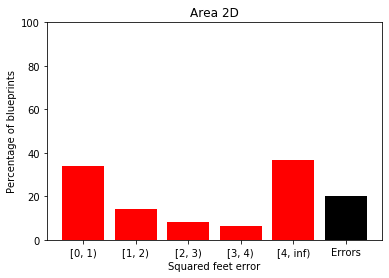

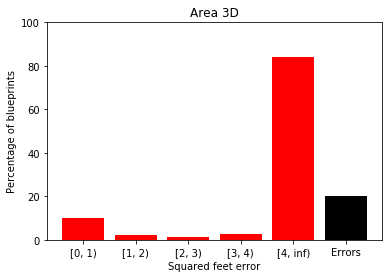

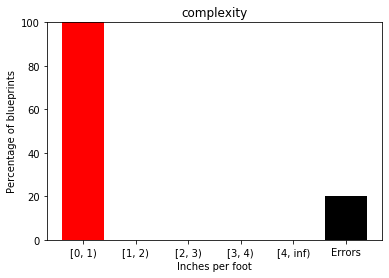

In [13]:
plt.title("Area 2D")
plt.xlabel("Squared feet error")
plt.ylabel("Percentage of blueprints")
plt.bar(range(len(results)), results, color=['red','red','red','red','red','black'])
plt.xticks(range(len(results)), labels)
plt.ylim([0, 100])
plt.savefig(URLoutput + "/Area2D.png")
plt.show()

plt.title("Area 3D")
plt.xlabel("Squared feet error")
plt.ylabel("Percentage of blueprints")
plt.bar(range(len(results2)), results2, color=['red','red','red','red','red','black'])
plt.xticks(range(len(results2)), labels)
plt.ylim([0, 100])
plt.savefig(URLoutput + "/Area2D.png")
plt.show()

plt.title("complexity")
plt.xlabel("Inches per foot")
plt.ylabel("Percentage of blueprints")
plt.bar(range(len(results3)), results3, color=['red','red','red','red','red','black'])
plt.xticks(range(len(results3)), labels)
plt.ylim([0, 100])
plt.savefig(URLoutput + "/Area2D.png")
plt.show()